# Supervised Machine Learning

## Section 1: Data Preparation and TF-IDF Vectorization

- **Loading the Data**: We use pandas to load our CSV file. This step converts the CSV into a DataFrame, making it easy to manipulate.
- **Extracting Text and Labels**: We assume that the DataFrame has at least two columns: "Text" (the raw document) and "Label" (its category). We extract these into separate variables.
- **TF-IDF Vectorization**: The TfidfVectorizer converts the raw text into a matrix where rows correspond to documents and columns to unique words (or tokens). Each cell holds the TF-IDF weight that reflects how important a word is in a document relative to the entire corpus.

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Load the dataset from the Excel file
data = pd.read_excel("sports_classification.xlsx")
print("Dataset preview:")
print(data.head())

corpus = data["article_text"].tolist()  # List of text samples
labels = data["label"]          # Corresponding labels

# View data and counts per label, plus all unique labels
print(data.shape)
print(f"# of 0 Labels: {sum(data["label"] == 0)}")
print(f"# of 1 Labels: {sum(data["label"] == 1)}")
print(f"Unique list of topics: {data["topic"].unique()}")

Dataset preview:
                                        article_text       topic  label
0  Soccer Football - Champions League - Group G -...    Football      1
1  Jun 13, 2022; San Francisco, California, USA; ...  Basketball      1
2  England's Lionesses have been relaxing on a bo...    Football      1
3  ATLANTA — This would have been a trip home for...    Baseball      1
4  UNICEF, a global humanitarian relief organisat...    Football      1
(1000, 3)
# of 0 Labels: 500
# of 1 Labels: 500
Unique list of topics: ['Football' 'Basketball' 'Baseball' 'Soccer' 'Space Exploration'
 'Extreme Weather and Cataclysms' 'Nutrition Research' 'Labor Activism'
 'Space Technology' 'Emerging Technologies' 'Cosmology & The Universe'
 'Chemistry and Material Sciences' 'Medical Innovations' 'SCOTUS'
 'Forex Trading & Speculation' 'Inflation' 'Biology' 'Climate Change'
 'Software Applications' 'Culture' 'Nonprofit, Charities, & Fundraising'
 'Europe Politics' 'Movies' 'United Kingdom Politics'
 'Persona

In [2]:
# Convert the text to TF-IDF features
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)

X.shape

(1000, 34920)

## Section 2: Train-Test Split
- **Purpose of the Split**: Splitting into training and testing sets ensures that we can evaluate our model’s performance on unseen data.

- **Preserving the Original Texts**: In addition to splitting the TF-IDF features (X) and labels, we also split the raw text (corpus) so that later we can refer back to the actual training texts when retrieving the nearest neighbors in the KNN model.

- **Random State**: The random_state parameter guarantees that the split is reproducible.

- [See documentation on train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#sklearn.model_selection.train_test_split)

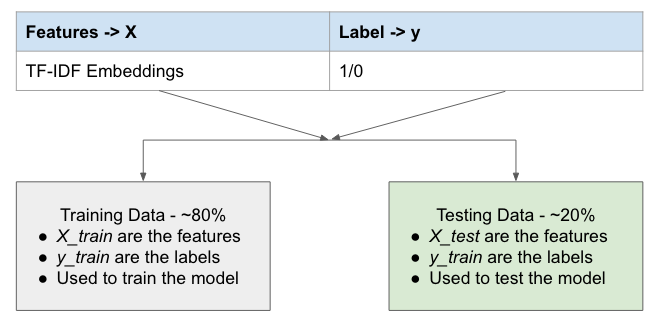

In [3]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)

(800, 34920)
(200, 34920)


## Section 3: Logistic Regression Model - Training
- **Model Training**: We instantiate a Logistic Regression model and fit it on the training data.
- **Model Description**: Logistic Regression is a linear model useful for binary (or multiclass) classification.
- [See documentation on LogisticRegression()](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

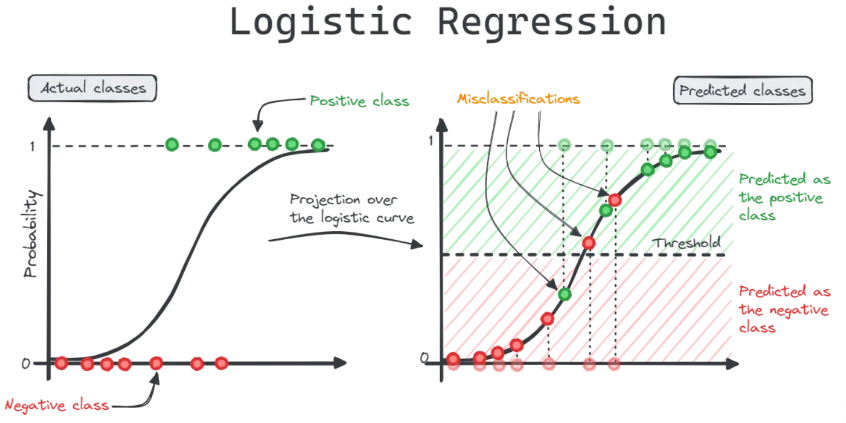

In [4]:
from sklearn.linear_model import LogisticRegression

# Train Logistic Regression Model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

LogisticRegression()

## Section 4: Logistic Regression Model - Testing
- **Evaluation**: After predicting on the test set, we print a classification report (which includes precision, recall, and F1-score) and visualize the performance with a confusion matrix.
- **Precision**: Measures how accurate positive predictions are.
- **Recall**: Measures how well a model can find all positive instances.
- **F1-Score**: Balance measure of Precision and Recall

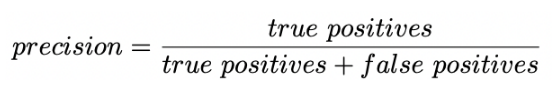

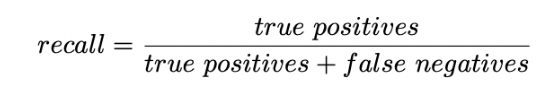

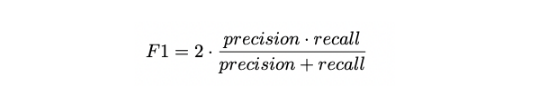

In [5]:
from sklearn.metrics import classification_report, confusion_matrix

# Evaluate the model on the test set
y_pred_lr = lr_model.predict(X_test)
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       104
           1       0.97      0.97      0.97        96

    accuracy                           0.97       200
   macro avg       0.97      0.97      0.97       200
weighted avg       0.97      0.97      0.97       200



## Section 5: Logistic Regression Model - Confusion Matrix
- **Interpretation**: The confusion matrix helps illustrate how many instances were correctly or incorrectly classified.


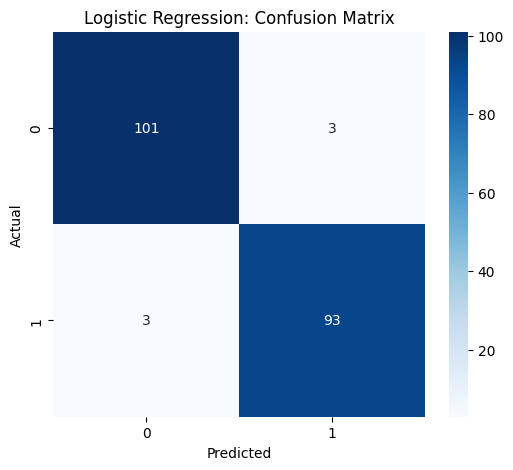

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the confusion matrix
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_lr, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Logistic Regression: Confusion Matrix")
plt.show()

## Section 6: Predicting New Text (Logistic Regression)
- **New Sample Prediction**: We take a new sports-related text sample, transform it using the same TF-IDF vectorizer (important to use the same vectorizer so that the new text is mapped to the same feature space), and predict its class using both classifiers.

In [7]:
# New text sample to classify
new_text = "An unexpected turn of events in the match."

# Transform the new text into TF-IDF features using the same vectorizer
new_features = vectorizer.transform([new_text])

# Predict with Logistic Regression
lr_model.predict(new_features)

array([0])

## Section 7: K-Nearest Neighbor
- **Building KNN**: We use the K-Nearest Neighbors classifier (with k=5) to classify our documents. KNN predicts the class of a new sample based on the majority class among its k nearest neighbors in the feature space.
- **Evaluation**: Just like Logistic Regression, we evaluate the KNN model using a classification report and a confusion matrix. This helps us compare the performance of both models.
- - [See documentation on KNeighborsClassifier()](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

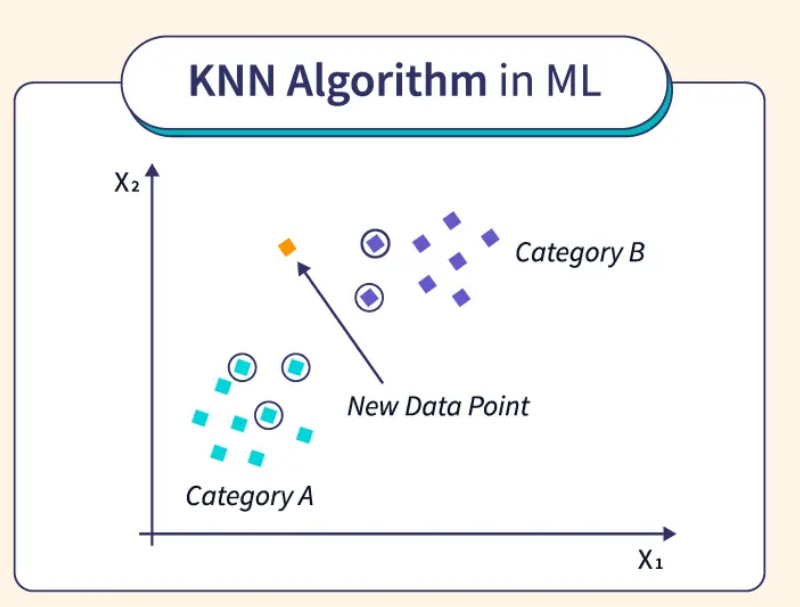

K-Nearest Neighbors Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.64      0.78       104
           1       0.72      1.00      0.84        96

    accuracy                           0.81       200
   macro avg       0.86      0.82      0.81       200
weighted avg       0.87      0.81      0.81       200



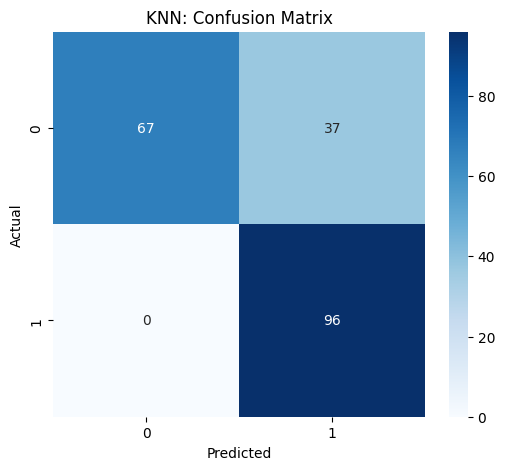

In [8]:
from sklearn.neighbors import KNeighborsClassifier

# Train a KNN model (using k=5 by default)
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Evaluate the KNN model on the test set
y_pred_knn = knn_model.predict(X_test)
print("K-Nearest Neighbors Classification Report:")
print(classification_report(y_test, y_pred_knn))

# Plot the confusion matrix for KNN
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_knn, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("KNN: Confusion Matrix")
plt.show()

## Section 8: Predicting New Text (KNN)

In [11]:
# Predict with KNN
knn_prediction = knn_model.predict(new_features)
print(f"KNN: The new text is classified as: {knn_prediction[0]}")

# Retrieve the top 5 nearest neighbors from the training set using KNN's kneighbors method
distances, indices = knn_model.kneighbors(new_features, n_neighbors=5)
print("\nTop 5 nearest training texts (with distances):")
for dist, idx in zip(distances[0], indices[0]):
    print(f"Distance: {dist:.4f} - Label: {data["label"].iloc[idx]} - Text: {data["article_text"].iloc[idx]}")

KNN: The new text is classified as: 1

Top 5 nearest training texts (with distances):
Distance: 1.3041 - Label: 0 - Text: A worker polishes a bicycle steel rim at a factory manufacturing sports equipment in Hangzhou, Zhejiang province, China September 2, 2019. China Daily via REUTERS Register now for FREE unlimited access to Reuters.comSummaryChina factory, services PMIs above 50 for first time since FebRecovery seen as COVID restrictions partially ease2022 GDP growth target still seen as ambitiousBEIJING, June 30 (Reuters) - China's factory and service sectors snapped three months of activity decline in June, business surveys showed on Thursday, as authorities lifted a strict COVID lockdown in Shanghai, reviving output and consumer spending.The official manufacturing purchasing managers' index (PMI) rose to 50.2 in June from 49.6 in May, the National Bureau of Statistics (NBS) said.That slightly missed the forecast for 50.5 in a Reuters poll but rose above the 50-point mark that separ